In [0]:
!pip3 install box2d-py==2.3.8

     |████████████████████████████████| 450kB 7.9MB/s 


In [0]:
import gym
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import base64
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam 
from keras.models import load_model, Model
import keras.backend as K
from collections import deque
from IPython import display as ipythondisplay

Using TensorFlow backend.


In [0]:
class A(object):
  def __init__(self,Alpha,Beta, Gamma, n_actions, 
               layer1_size,layer2_size, input_dims):
    self.gamma = Gamma
    self.learning_rate = Alpha
    self.Beta = Beta
    self.input_dims = input_dims
    self.layer1_size = layer1_size
    self.layer2_size = layer2_size
    self.n_actions= n_actions

    self.actor, self.critic, self.policy = self.building_actor_critic()
    self.action_space= [i for i in range (self.n_actions)]

  def building_actor_critic(self):
    frames_input = Input(shape =(self.input_dims,))
    advantages = Input(shape=[1])
    hidden1 =Dense(self.layer1_size,activation = 'relu')(frames_input)#buildingnueralnetwork
    hidden2 =Dense(self.layer2_size,activation = 'relu')(hidden1)
    output_F = Dense(self.n_actions,activation='softmax')(hidden2)
    values = Dense(1,activation = 'linear')(hidden2)

    def loss(y_true,y_pred): #-log-likelihood
      out = K.clip(y_pred,1e-8,1-1e-8)
      log_lik = y_true*K.log(out)
      return K.sum(-log_lik*advantages)
    
    actor = Model(input=[frames_input,advantages], output =[output_F])#
    actor.compile(optimizer=Adam(lr=self.learning_rate),loss=loss)

    critic = Model(input=[frames_input],output=[values])
    critic.compile(optimizer=Adam(lr=self.Beta),loss='mean_squared_error')

    policy = Model(input= [frames_input],output = [output_F])
    return actor, critic, policy

  def choose_action(self, observation):#actionspace
    state = observation[np.newaxis, :]
    probabilities = self.policy.predict(state)[0]
    action = np.random.choice(self.action_space, p= probabilities)
    return action
  
  def learn(self,state,action,reward,state_,done):#agent_learning_alg
    state = state[np.newaxis, :]
    state_ = state_[np.newaxis, :]
    critic_value_ = self.critic.predict(state_)
    critic_value = self.critic.predict(state)

    target = reward + self.gamma*critic_value_*(1-int(done))
    advantages = target - critic_value

    actions = np.zeros([1,self.n_actions])
    actions[np.arange(1),action] = 1

    self.actor.fit([state, advantages], actions, verbose = 0)
    self.critic.fit(state, target, verbose = 0)


In [0]:
 def main():
  env = gym.make('LunarLander-v2')
  trials  = 3000
  total_rewards = []
  episode= 0
  agent = A(Gamma=0.99,Alpha=0.00001, Beta = 0.00005,n_actions = 4,layer1_size = 1024,
            layer2_size = 512,input_dims = 8)#setting_hyperparameters

  for trail in range(trials):
    observation = env.reset()
    total_reward = 0
    done= False

    while not done:
      action = agent.choose_action(observation)
      observation_,reward,done,_ = env.step(action)
      agent.learn(observation,action,reward,observation_,done)
      observation = observation_
      total_reward +=reward
    total_rewards.append(total_reward)
    print('Trial number',trail)
    print('Trial Reward',total_reward)
  return total_rewards

In [0]:
if __name__ == "__main__":
  total_rewards = main()

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Streaming output truncated to the last 5000 lines.
Trial Reward -188.96931577553477
Trial number 501
Trial Reward -206.79725901221343
Trial number 502
Trial Reward -161.4380872157355
Trial number 503
Trial Reward -153.3480970601002
Trial number 504
Trial Reward -200.94845833336475
Trial number 505
Trial Reward -166.08024161404347
Trial number 506
Trial Reward -195.93947619087112
Trial number 507
Trial Reward -100.45182024345308
Trial number 508
Trial Reward -142.20705674527073
Trial number 509
Trial Reward -409.1373477528083
Trial number 510
Trial Reward -218.4210365440225
Trial number 511
Trial Reward -203.34206391923937
Trial number 512
Trial Reward -233.6559903352508
Trial number 513
Trial Reward -183.2921205335079
Trial number 514
Trial Reward -184.80261084210048
Trial number 515
Trial Reward -173.25994670371682
Trial number 516
Trial Reward -216.38374631486087
Trial number 517
Trial Reward -164.7489039054807
Trial number 518
Trial Reward -280.00905068151064
Trial number 519
Trial 

[-264.4164937371356, -76.47790239299167, -67.57105465210388, -64.89484749426778, -41.37731441714745, -144.90331047189756, -85.07951896868717, -118.56947403662747, -251.43170503310554, -57.136898104654335, -177.92779101312854, -320.9323609080663, -502.4035833195674, -308.98270896715724, -298.398541547638, -225.81104823303377, -187.12293459156257, -233.77502167893175, -179.25825704285162, -357.4370977797912, -132.60130592213758, -165.9874789699861, -210.15775206040166, -141.85588966122955, -301.10756040771514, -31.74252229354832, -109.71482017055844, -60.87690222346941, -201.352600960733, -299.6240541718961, -225.14056521540022, -221.44621549312757, -260.85878041292966, -254.4624633166094, -127.1332748277206, -105.26097008165495, -115.53205427195576, -93.67023463194937, -274.9214879108198, -144.4084433172887, -338.26073009032314, -277.73950415089166, -249.05288427766902, -297.67060122595893, -408.6650955254389, -363.52307009823164, -433.6052043403002, -222.2811322895227, -160.25718717188

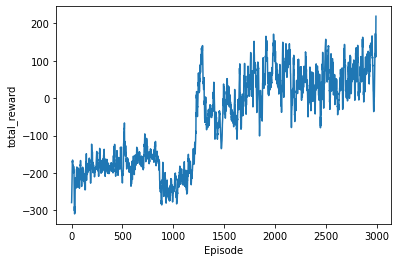

In [0]:
window = 10
plt.xlabel('Episode')
plt.ylabel('total_reward')
plt.plot([np.mean(total_rewards[tr:tr+window]) for tr in range(window, len(total_rewards))])
print(total_rewards)